# EDA Acidentes de Trânsito

#### Este DataSet foi utilizado como caso de estudo para meu Portfolio de Análise de Dados. Você pode encontra-lo por meio deste [Link](http://www.kaggle.com/datasets/oktayrdeki/traffic-accidents).

#### O Dataset possui registros de acidentes de trânsito entre os anos de 2013 e 2025, com diferentes métricas, como por exemplo: data, condições climáticas, condições de iluminação, tipos de acidentes, lesões e envolvimento do veículo.

####  Neste documento, executarei o processo de EDA (Exploratory Data Analysis), usando a visualização de dados para tentar encontrar padrões e outros tipos de insights.

## Informações sobre o DataSet

O Dataset possui as seguintes colunas:


* **crash_date**: A data em que o acidente ocorreu.  
* **traffic_control_device**: O tipo de dispositivo de controle de tráfego envolvido (ex.: semáforo, placa).  
* **weather_condition**: As condições climáticas no momento do acidente.  
* **lighting_condition**: As condições de iluminação no momento do acidente.  
* **first_crash_type**: O tipo inicial da colisão (ex.: frontal, traseira).  
* **trafficway_type**: O tipo de via envolvida no acidente (ex.: rodovia, rua local).  
* **alignment**: O alinhamento da via onde o acidente ocorreu (ex.: reta, curva).  
* **roadway_surface_cond**: A condição da superfície da via (ex.: seca, molhada, com gelo).  
* **road_defect**: Quaisquer defeitos presentes na superfície da via.  
* **crash_type**: O tipo geral do acidente.  
* **intersection_related_i**: Se o acidente esteve relacionado a um cruzamento.  
* **damage**: A extensão dos danos causados pelo acidente.  
* **prim_contributory_cause**: A principal causa contributiva do acidente.  
* **num_units**: O número de veículos envolvidos no acidente.  
* **most_severe_injury**: A lesão mais grave registrada no acidente.  
* **injuries_total**: O número total de feridos relatados.  
* **injuries_fatal**: O número de feridos fatais resultantes do acidente.  
* **injuries_incapacitating**: O número de feridos com lesões incapacitantes.  
* **injuries_non_incapacitating**: O número de feridos com lesões não incapacitantes.  
* **injuries_reported_not_evident**: O número de feridos relatados, mas sem evidência visível.  
* **injuries_no_indication**: O número de casos sem indicação de ferimentos.  
* **crash_hour**: A hora em que o acidente ocorreu.  
* **crash_day_of_week**: O dia da semana em que o acidente ocorreu.  
* **crash_month**: O mês em que o acidente ocorreu.  


# Objetivos do Projeto

* #### Explorar habilidades de limpeza dos dados referentes aos registros de Acidentes de Trânsito.
* #### Encontrar padrões, insights e correlações entre os acidentes à partir das consultas geradas.

# Importação das Bibliotecas

#### Para estas análises serão utilizadas as seguintes bibliotecas:

* **Numpy**: Para utilização de funções de cálculo
* **Pandas**: Para a leitura e manipulação do dataset.
* **Matplotlib**: Para a plotagem dos gráficos.
* **Seaborn**: Para a plotagem dos gráficos.

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/traffic-accidents/traffic_accidents.csv


# Importação e Limpeza inicial dos dados

In [355]:
data = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')

In [356]:
data.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [358]:
data.shape

(209306, 24)

In [359]:
data.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [360]:
data.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


# Detalhamento da Limpeza

### No código abaixo, fiz os seguintes ajustes:
* #### conversão dos registros da coluna crash_date para que contenha apenas a Data.
* #### conversão dos registros da coluna crash_day_of_week para que contenha os dias da semana por extenso.
* #### conversão dos registros da coluna crash_month para que contenha os meses do ano por extenso.

In [361]:
# Converter a coluna "crash_date" para datetime e manter apenas a data (YYYY-MM-DD)
data["crash_date"] = pd.to_datetime(data["crash_date"], format="%m/%d/%Y %I:%M:%S %p").dt.date

# Converter a coluna day_of_week para tipo inteiro (caso esteja como string)
data["crash_day_of_week"] = data["crash_day_of_week"].astype(int, errors="ignore")

# Criar o dicionário de mapeamento dos dias da semana
days_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Substituir os valores
data["crash_day_of_week"] = data["crash_day_of_week"].map(days_mapping)

# Converter a coluna crash_month para tipo inteiro (caso esteja como string)
data["crash_month"] = data["crash_month"].astype(int, errors="ignore")

# Criar o dicionário de mapeamento dos meses
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Substituir os valores
data["crash_month"] = data["crash_month"].map(month_mapping)

# Inicio da Exploração e Análise dos dados.

In [362]:
# Contar o número total de registros de acidentes
total_acidentes = len(data)

# Exibir o resultado
print(f"Total de registros de acidentes: {total_acidentes}")

Total de registros de acidentes: 209306


# Distribuição de acidentes por diferentes fatores


* #### Acidentes x "weather_condition"
* #### Acidentes x "traffic_control_device"
* #### Acidentes x "lighting_condition"
* #### Acidentes x "trafficway_type"
* #### Acidentes x "roadway_surface_cond"
* #### Acidentes x "crash_type"


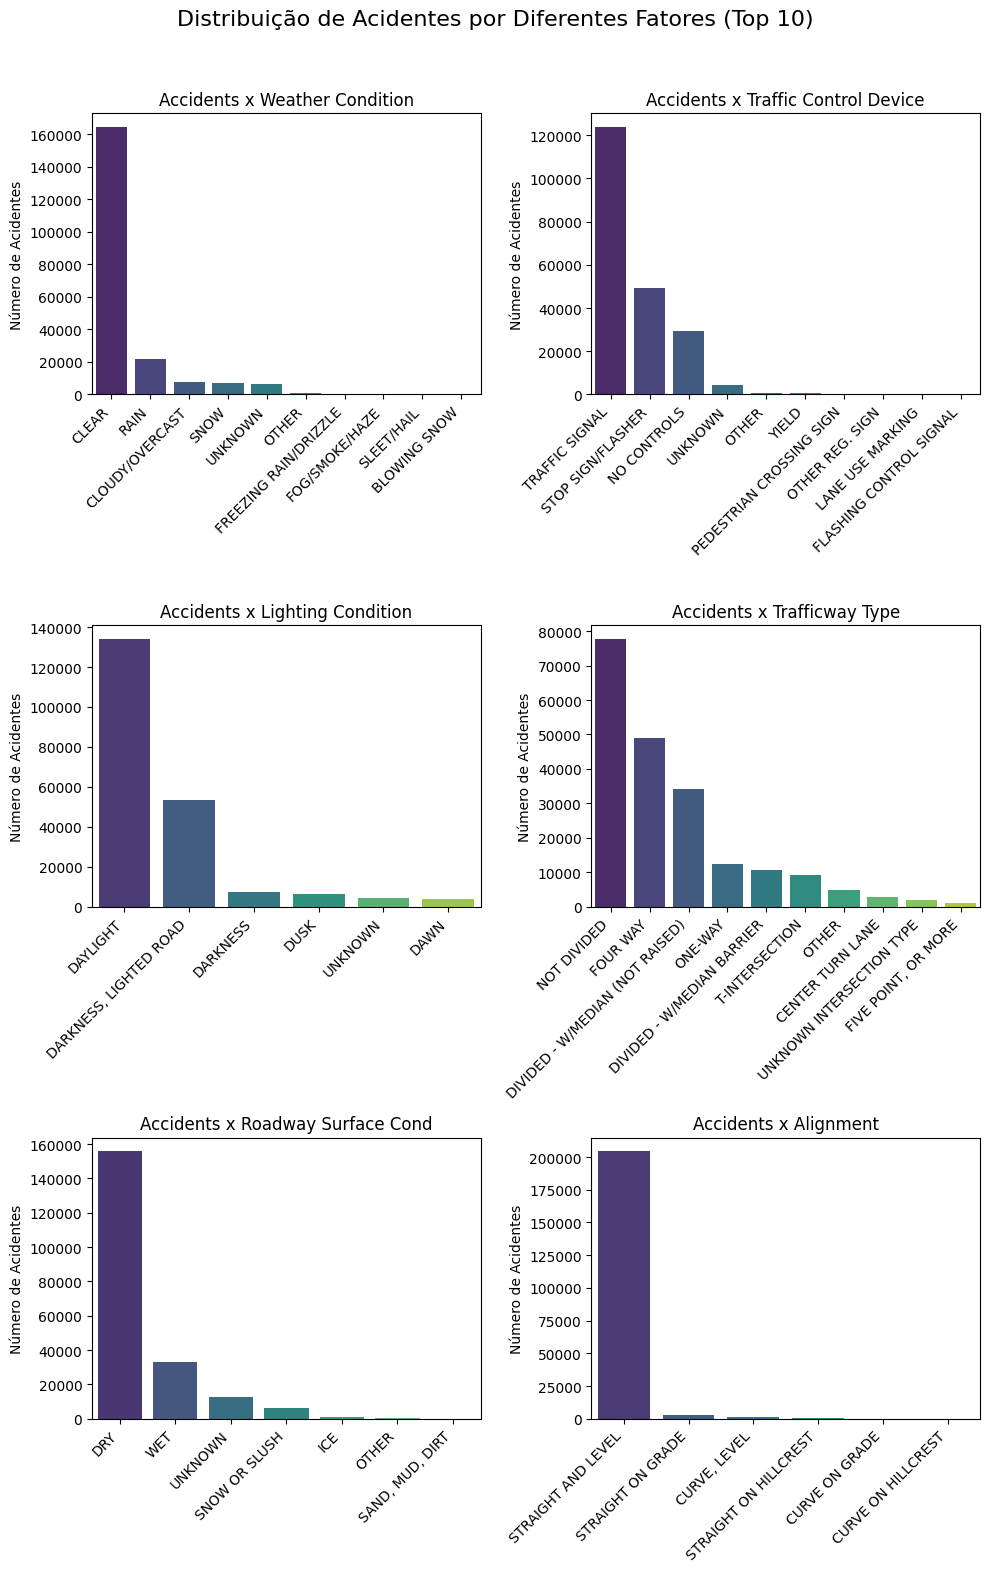

In [363]:
# Definir variáveis para análise
categorical_features = [
    "weather_condition",
    "traffic_control_device",
    "lighting_condition",
    "trafficway_type",
    "roadway_surface_cond",
    "alignment"
]

# Criar subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
fig.suptitle("Distribuição de Acidentes por Diferentes Fatores (Top 10)", fontsize=16)

# Iterar sobre as variáveis categóricas e criar gráficos de barras
for ax, feature in zip(axes.flat, categorical_features):
    accident_counts = data[feature].value_counts().nlargest(10)  # Pegando apenas os 10 principais

    sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="viridis", ax=ax)
    
    ax.set_title(f"Accidents x {feature.replace('_', ' ').title()}")
    ax.set_xlabel("")
    ax.set_ylabel("Número de Acidentes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Com esses dados, podemos entender que a maior quantidade de acidentes acontecem em condições favoráveis para o tráfego, mostrando que o que pode impactar, é a provavel maior quantidade de pessoas digirindo nessas boas condições, causando um tráfego mais carregado e como consequência, aumento nos acidentes.

# Análise dos Dados Divididos por Ano.

In [364]:
# Contar a quantidade de acidentes por ano
data["crash_year"] = pd.to_datetime(data["crash_date"]).dt.year
accidents_per_year = data["crash_year"].value_counts().sort_index()

# Exibir o resultado
print(accidents_per_year)

crash_year
2013        2
2015     1917
2016     7615
2017    17655
2018    27438
2019    27959
2020    22784
2021    25689
2022    25543
2023    25454
2024    26214
2025     1036
Name: count, dtype: int64


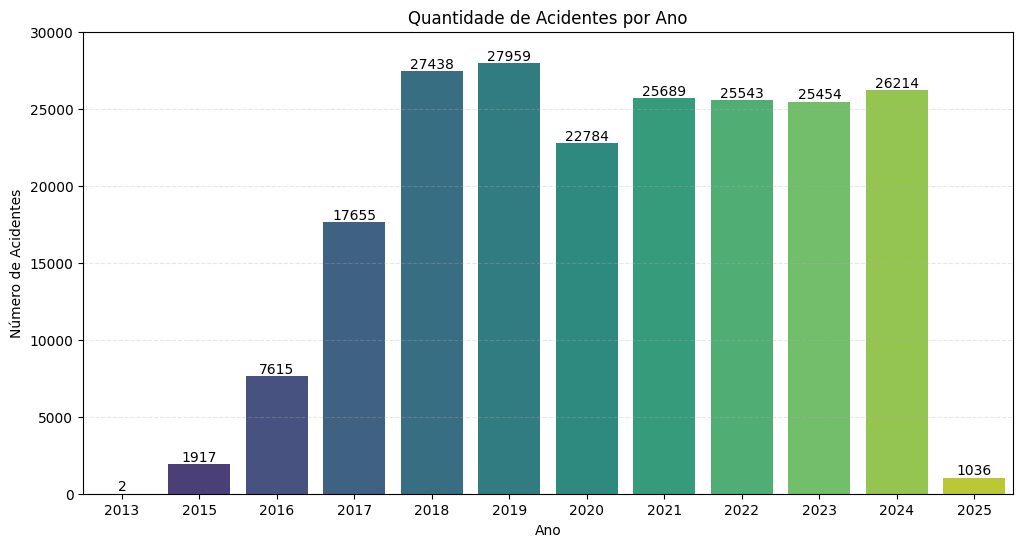

In [365]:
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax = sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Ano")
plt.ylabel("Número de Acidentes")
plt.title("Quantidade de Acidentes por Ano")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.ylim(0, 30000)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


#### O grande aumento que pode ser visto principalmente entre os anos de 2013 e 2018, pode ser reflexo do início da coleta dos dados, com isso a quantidade de registros foi menor. Porém como não temos dados mais profundos, não conseguimos explorar essa hipotese mais a fundo.

# Análise de Dados Divididos por Mês

In [366]:
# Contar a quantidade de acidentes por mês
accidents_per_month = data["crash_month"].value_counts().sort_index()

# Exibir o resultado
accidents_per_month

crash_month
April        15096
August       18350
December     18816
February     14621
January      16606
July         17834
June         17851
March        15265
May          17432
November     18328
October      20089
September    19018
Name: count, dtype: int64

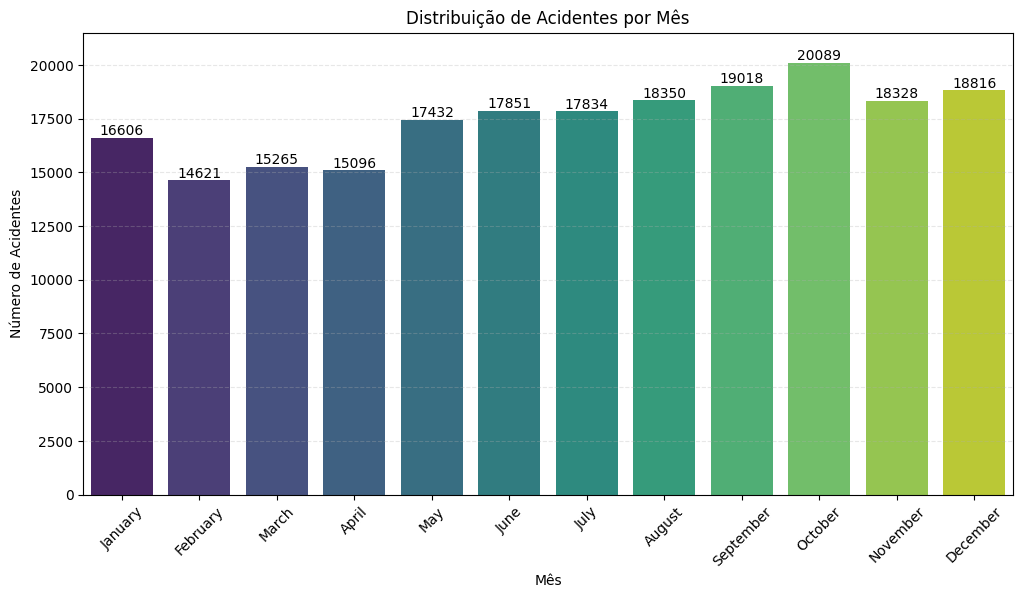

In [367]:
plt.figure(figsize=(12, 6))

# Criar gráfico de barra com os meses na ordem correta
order_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

ax = sns.countplot(x=data["crash_month"], order=order_months, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Mês")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por Mês")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(rotation=45)  # Gira os anos para melhor visualização
plt.ylim(0, 21500)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


#### é Possível notar que não existe uma grande variação na quantidade de acidentes durante os meses do ano, apenas uma redução dos registros de Janeiro até Abril, e um pico de registros em Outubro.

# Análise dos Dados por Dia da Semana

In [368]:
# Contar a quantidade de acidentes por dia da semana
accidents_per_day = data["crash_day_of_week"].value_counts().sort_index()

# Exibir o resultado
accidents_per_day

crash_day_of_week
Friday       34458
Monday       27938
Saturday     30710
Sunday       25246
Thursday     30787
Tuesday      30074
Wednesday    30093
Name: count, dtype: int64

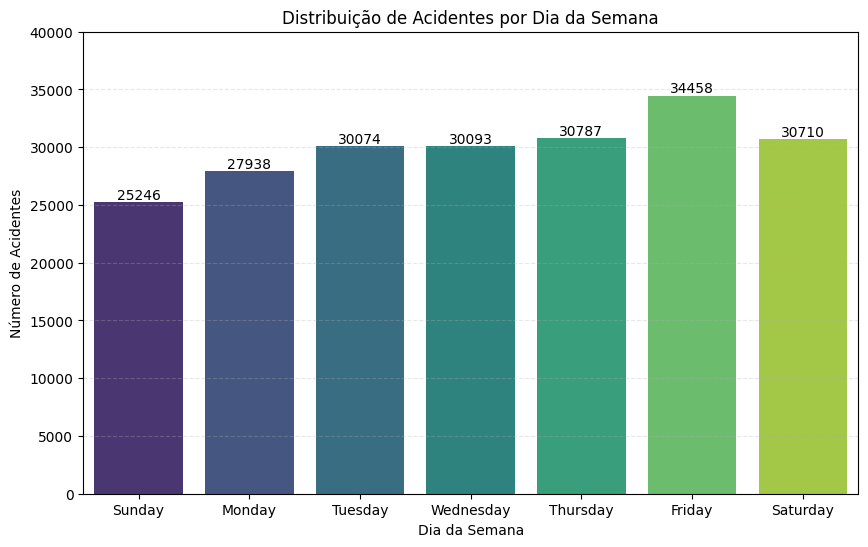

In [369]:
plt.figure(figsize=(10, 6))

# Criar gráfico de barras com os dias da semana na ordem correta
order_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

ax = sns.countplot(x=data["crash_day_of_week"], order=order_days, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por Dia da Semana")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.ylim(0, 40000)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


#### Este gráfico nos traz um insight relevante, o dia da semana com mais acidentes é a Sexta-feira, muito provavelmente o dia que as pessoas saem para balada, podem consumir bebida alcoólica, ou estarem distraidas voltando do trabalho, causando assim, um aumento nos acidentes.

# Análise dos Dados por Hora do Dia

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


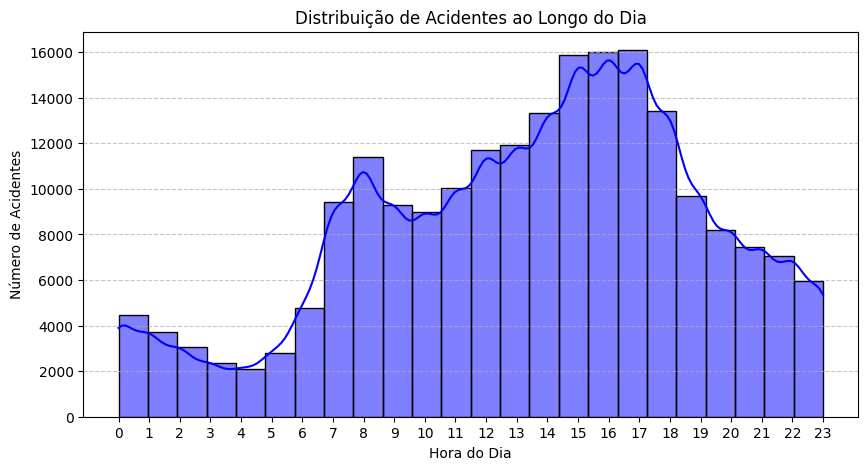

In [370]:
plt.figure(figsize=(10, 5))

# Criando histograma da quantidade de acidentes por hora do dia
sns.histplot(data["crash_hour"], bins=24, kde=True, color="blue")
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Personalizando o gráfico
plt.xticks(range(0, 24))  # Garantindo que todas as horas apareçam no eixo X
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes ao Longo do Dia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()


# Podemos notar que existem dois momentos que mais chamam atenção, que apresentam aumentos na quantidade de registros.

* #### 7 - 9 onde as pessoas saem para trabalhar e o tráfego aumenta
* #### 15 - 17 onde as pessoas estão voltando do trabalho e eo tráfego fica bastante carregado.

#### Estes dois principais picos, nos apontam horários onde muitas pessoas estão nas ruas com seus carros, causando assim um grande aumento nos registros de acidentes.

In [371]:
total_victims = data["injuries_total"].sum()
print(f"Quantidade total de vítimas: {int(total_victims)}")

Quantidade total de vítimas: 80105


# Análise dos Dados por Condição Climática

In [372]:
# Contar a quantidade de acidentes condição climática
accidents_per_weather_condition = data["weather_condition"].value_counts()

# Exibir o resultado
accidents_per_weather_condition

weather_condition
CLEAR                       164700
RAIN                         21703
CLOUDY/OVERCAST               7533
SNOW                          6871
UNKNOWN                       6534
OTHER                          627
FREEZING RAIN/DRIZZLE          510
FOG/SMOKE/HAZE                 360
SLEET/HAIL                     308
BLOWING SNOW                   127
SEVERE CROSS WIND GATE          32
BLOWING SAND, SOIL, DIRT         1
Name: count, dtype: int64

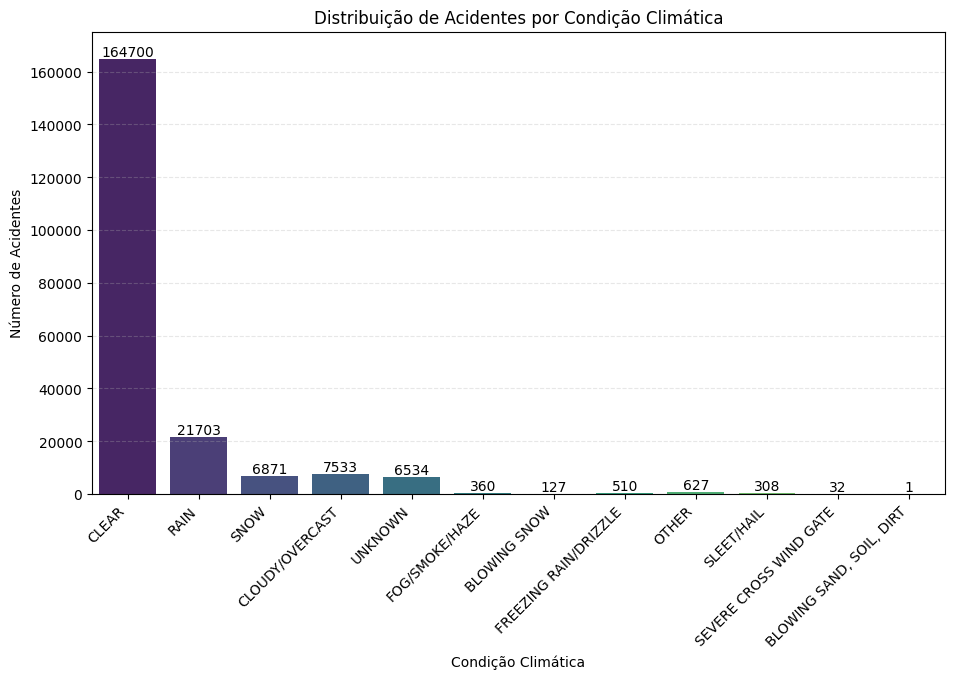

In [373]:
plt.figure(figsize=(11, 6))

# Criando o gráfico de barras para condições climáticas
ax = sns.countplot(x=data["weather_condition"], palette="viridis")

# Personalizando o gráfico
plt.xlabel("Condição Climática")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por Condição Climática")
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.ylim(0, 175000)

# Adicionando os rótulos acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()

#### Como citado no início das análises exploratórias, a maior parte dos acidentes acontece em boas condições climáticas, muito provavelmente pelo aumento do tráfego, devido às condições ideais para se dirigir, então com o aumento do tráfego, também aumentam os acidentes.

In [374]:
# Contar o número total de acidentes
print(f"Quantidade total de acidentes: {len(data)}")

# Contar o número de acidentes com vítimas fatais (injuries_fatal > 0)
acidentes_com_fatalidade = len(data[data["injuries_fatal"] > 0])

# Exibir o resultado
print(f"Total de acidentes com vítimas fatais: {acidentes_com_fatalidade}")

# Calcular a porcentagem de acidentes com vítimas fatais
porcentagem_fatalidade = (acidentes_com_fatalidade / len(data)) * 100

# Exibir o resultado
print(f"Porcentagem de acidentes com vítimas fatais: {porcentagem_fatalidade:.2f}%")

Quantidade total de acidentes: 209306
Total de acidentes com vítimas fatais: 351
Porcentagem de acidentes com vítimas fatais: 0.17%


## De todos os acidentes registrados, 351 deixaram vítmas fatais, isso representa 0,17% de toda a amostragem do dataset.

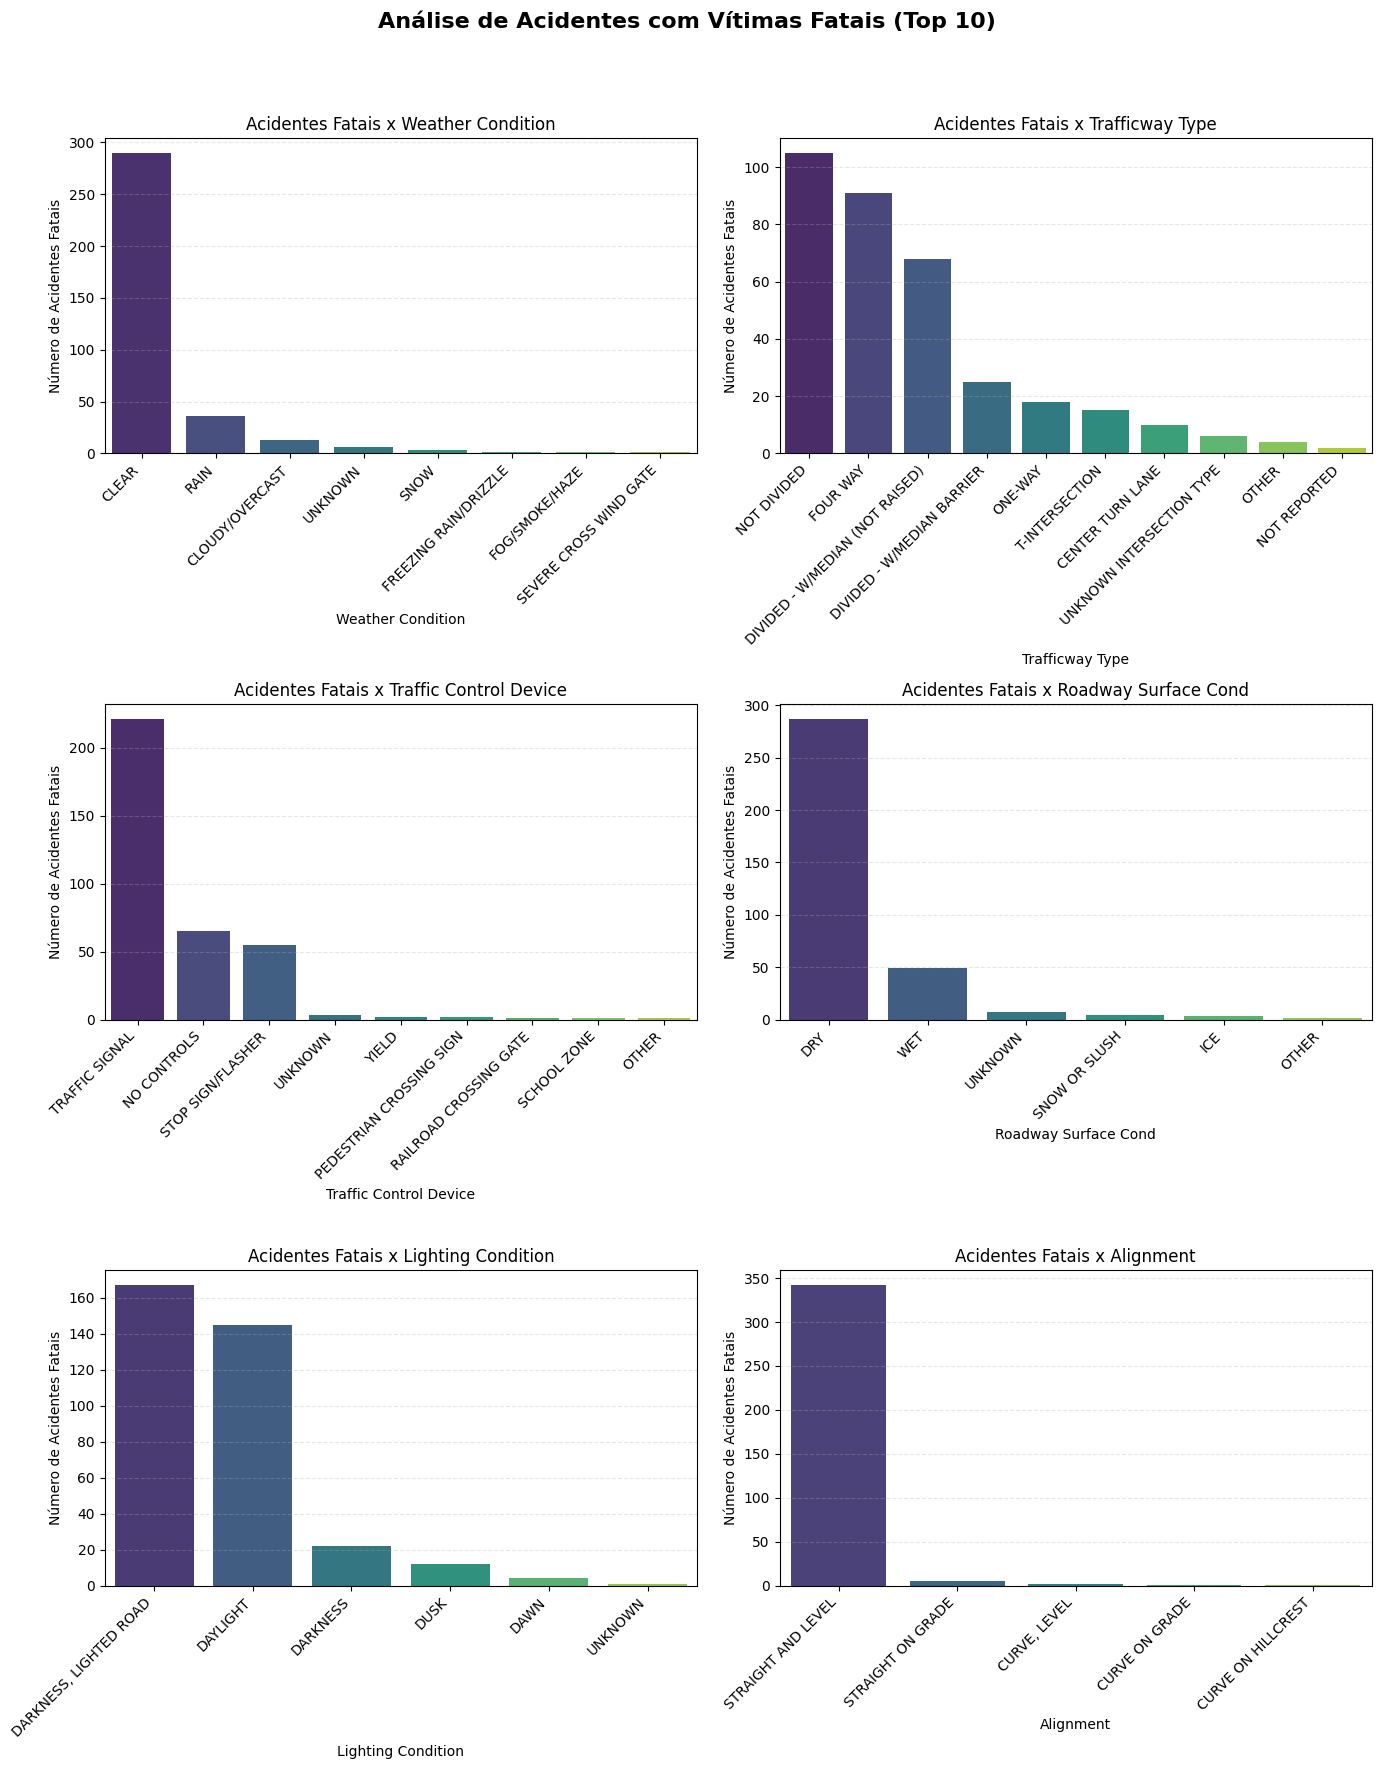

In [375]:
# Filtrando os dados para pegar apenas os acidentes com vítimas fatais
acidentes_com_fatalidade = data[data["injuries_fatal"] > 0]

# Criando a figura com múltiplos subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # Ajuste para 3 linhas e 2 colunas
fig.suptitle("Análise de Acidentes com Vítimas Fatais (Top 10)", fontsize=16, fontweight="bold")

# Lista de variáveis a serem analisadas
variaveis = ["weather_condition", "traffic_control_device", "lighting_condition", 
             "trafficway_type", "roadway_surface_cond", "alignment"]

# Criando os gráficos de barras para cada variável
for i, var in enumerate(variaveis):
    ax = axes[i % 3, i // 3]  # Alteração para distribuir corretamente em 2 colunas por linha
    contagem = acidentes_com_fatalidade[var].value_counts().nlargest(10)  # Pegando o Top 10

    sns.barplot(x=contagem.index, y=contagem.values, palette="viridis", ax=ax)  # Agora o eixo Y é a quantidade
    ax.set_title(f"Acidentes Fatais x {var.replace('_', ' ').title()}", fontsize=12)
    ax.set_xlabel(var.replace('_', ' ').title())
    ax.set_ylabel("Número de Acidentes Fatais")
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotação para melhor leitura

# Ajustando espaçamento entre os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Exibir o gráfico
plt.show()

#### No grid de gráficos acima, podemos ver a relação da quantidade de acidentes fatais perante diferentes fatores. Mais uma vez, a maioria dos acidentes acontece com o tráfego em condições favoráveis.

### Como dito acima, a maioria dos acidentes acontece em condições favoráveis, as proximas análises serão feitas removendo estes casos, para que possamos entender, referente às situações desfavoráveis, quais são mais impactantes.

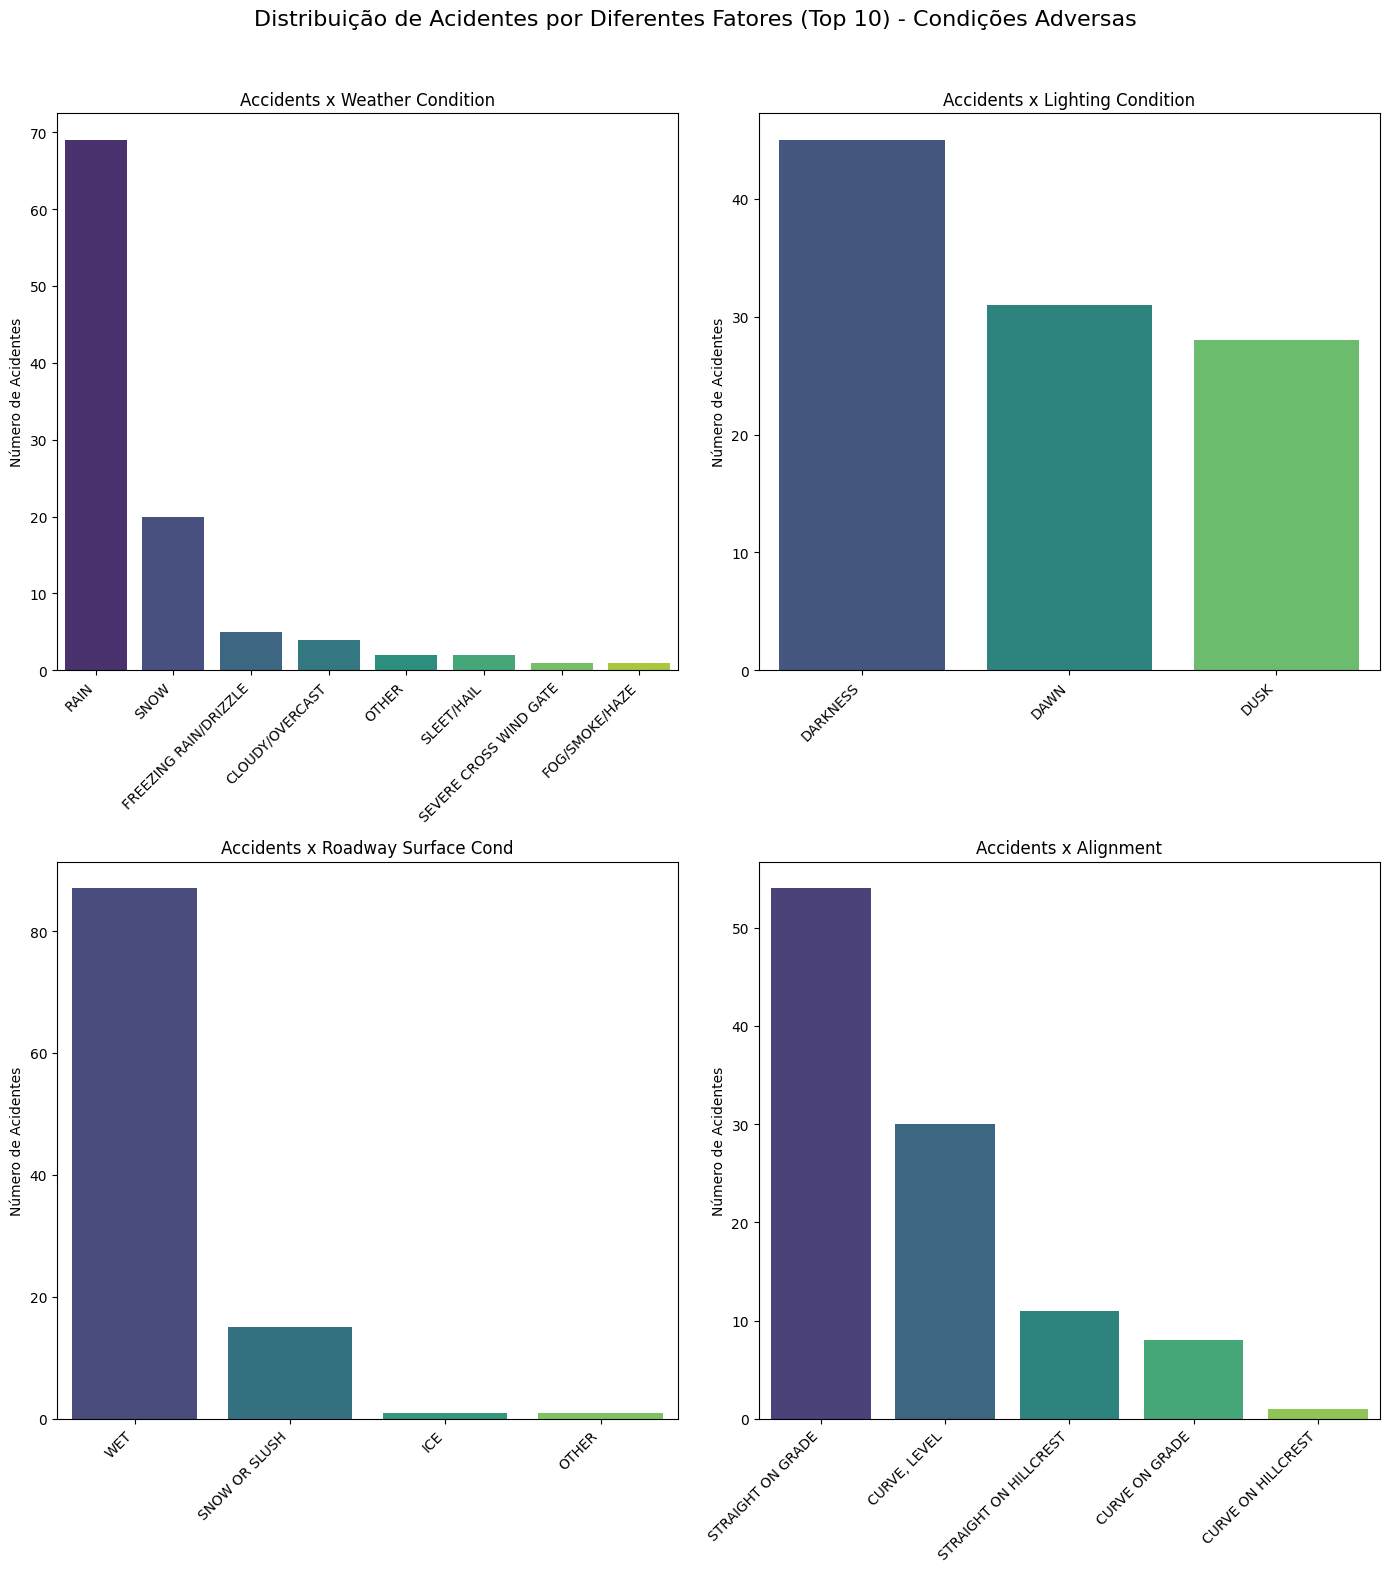

In [376]:
categorical_features = [
    "weather_condition",
    "lighting_condition",
    "roadway_surface_cond",
    "alignment"
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 16))
fig.suptitle("Distribuição de Acidentes por Diferentes Fatores (Top 10) - Condições Adversas", fontsize=16)

# Aplicar filtros para remover condições favoráveis
data_filtered = data[
    (~data["weather_condition"].isin(["CLEAR", "UNKNOWN"])) &
    (~data["lighting_condition"].isin(["DAYLIGHT", "DARKNESS, LIGHTED ROAD", "UNKNOWN"])) &
    (~data["roadway_surface_cond"].isin(["DRY", "UNKNOWN"])) &
    (~data["alignment"].isin(["STRAIGHT AND LEVEL", "UNKNOWN"]))
]

# Iterar sobre as variáveis categóricas e criar gráficos de barras
for ax, categoria in zip(axes.flat, categorical_features):
    accident_counts = data_filtered[categoria].value_counts().nlargest(10)  # Pegando apenas os 10 principais

    sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="viridis", ax=ax)
    
    ax.set_title(f"Accidents x {categoria.replace('_', ' ').title()}")
    ax.set_xlabel("")
    ax.set_ylabel("Número de Acidentes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Com estes gráficos é possível ver com mais clareza a relação das condições menos favoráveis com a quantidade de acidentes.
* #### A **condição climática** com maior incidencia em acidentes é a **Chuva** seguida por **Neve**.
* #### A **condição de iluminação** com maior incidencia em acidentes é a **Escuridão** seguido por **Nascer do Sol** e **Crepúsculo**.
* #### A **condição da rodovia** com maior incidência nos acidentes é a pista **Molhada** seguida por **Neve e Granizo**.
* #### A **condição de alinhamento de via** com maior incidência nos acidentes é a **Reta com Subida**, seguida por **Curvas**.

## Faremos o mesmo com os dados para acidentes com vítimas fatais.

Número de registros após filtragem (Weather Condition): 55
Número de registros após filtragem (Lighting Condition): 38
Número de registros após filtragem (Roadway Surface Cond): 57
Número de registros após filtragem (Alignment): 9


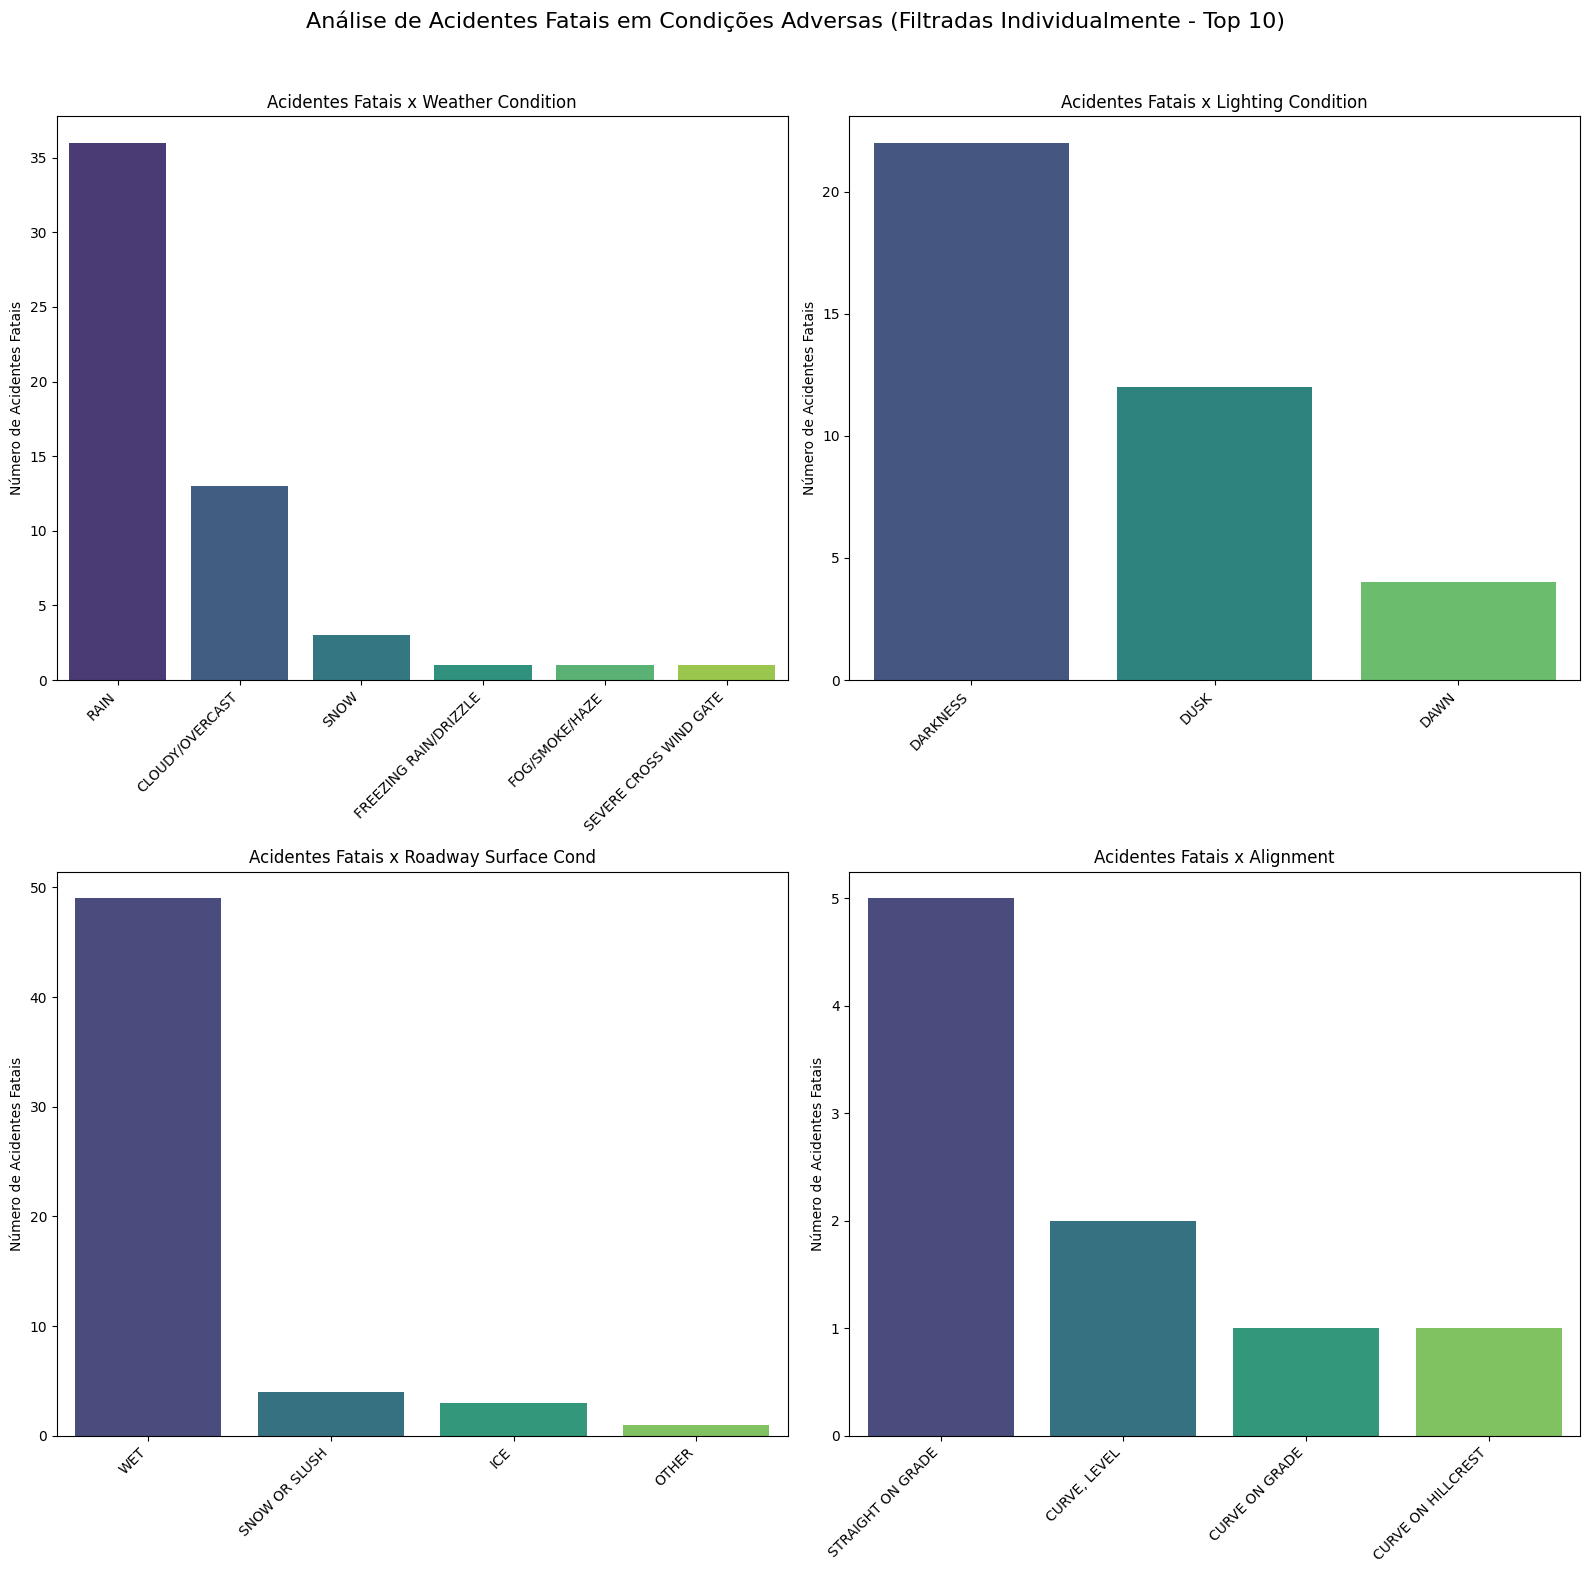

In [384]:
# Filtrando os dados para pegar apenas os acidentes com vítimas fatais
acidentes_com_fatalidade = data[data["injuries_fatal"] > 0]

categorical_features = [
    "weather_condition",
    "lighting_condition",
    "roadway_surface_cond",
    "alignment"
]

# Filtros individuais para cada categoria
filters = {
    "weather_condition": ["CLEAR", "UNKNOWN"],
    "lighting_condition": ["DAYLIGHT", "DARKNESS, LIGHTED ROAD", "UNKNOWN"],
    "roadway_surface_cond": ["DRY", "UNKNOWN"],
    "alignment": ["STRAIGHT AND LEVEL", "UNKNOWN"]
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle("Análise de Acidentes Fatais em Condições Adversas (Filtradas Individualmente - Top 10)", fontsize=16)

# Iterar sobre as variáveis categóricas e criar gráficos de barras
for ax, feature in zip(axes.flat, categorical_features):
    # Aplicar filtro individual para cada categoria
    filtered_data = acidentes_com_fatalidade[~acidentes_com_fatalidade[feature].isin(filters[feature])]

    accident_counts = filtered_data[feature].value_counts().nlargest(10)  # Pegando apenas os 10 principais

    sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="viridis", ax=ax)
    
    ax.set_title(f"Acidentes Fatais x {feature.replace('_', ' ').title()}")
    ax.set_xlabel("")
    ax.set_ylabel("Número de Acidentes Fatais")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    print(f"Número de registros após filtragem ({feature.replace('_', ' ').title()}): {filtered_data.shape[0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Com estes gráficos é possível ver com mais clareza a relação das condições menos favoráveis com a quantidade de acidentes com **Vítimas Fatais**.
* #### A **condição climática** com maior incidencia em acidentes é a **Chuva** seguida por **Nublado**.
* #### A **condição de iluminação** com maior incidencia em acidentes é a **Escuridão** seguido por **Crepúsculo** e **Nascer do Sol**.
* #### A **condição da rodovia** com grande maioria incidência nos acidentes é a pista **Molhada**.
* #### A **condição de alinhamento de via** com maior incidência nos acidentes é a **Reta com Subida**, seguida por **Curvas**.